In [7]:
import scipy as sp
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from matplotlib.colors import LogNorm

In [2]:
xsec = {'5.99E-3': [0.0102, 0.000825, 0.0641, 0.1325, 2.494387627837366e-08, 0.0186, 0.0001923076923076923, 0.0611, 0.00125, 0.0005], '2.15E-3': [0.00010869565217391305, 0.0018, 0.00062, 0.0055, 0.0025, 1.0038610038610038e-05, 0.0172, 1.2355441336364534e-07, 0.0085, 0.00068], '4.64E-2': [2.3062730627306275e-06, 0.002, 0.0008666666666666666, 0.0232, 0.0003857142857142857, 0.0271, 5.555555555555556e-05, 0.00175, 4.126984126984127e-05, 0.0025], '1.00E+0': [0.0038, 2.4992970726983035e-08, 2.494387627837366e-08, 8.172605426610004e-07, 2.494387627837366e-08, 2.494387627837366e-08, 1.3291509383805624e-07, 2.494387627837366e-08, 1.7083504168375017e-07, 2.494387627837366e-08], '1.00E-4': [0.0008333333333333334, 0.0863, 0.0028, 0.0511, 1.3272077590607452e-06, 0.00014210526315789474, 0.00016666666666666666, 1.2440191387559808e-05, 0.0053, 0.0036], '1.67E-2': [0.0112, 0.0075, 1.462843768285547e-06, 0.0061, 0.0008333333333333334, 0.0005, 2.0434853686447604e-07, 3.0902348578491965e-06, 0.0001923076923076923, 0.038], '3.59E-1': [4.736842105263158e-05, 2.494387627837366e-08, 0.000625, 0.0256, 0.0009, 7.48502994011976e-06, 8.520790729379687e-07, 0.00011363636363636364, 3.2142857142857144e-05, 5.1652892561983475e-06], '7.74E-4': [7.878787878787879e-05, 0.0025, 2.714735584754045e-07, 8.090614886731391e-06, 3.809523809523809e-05, 0.00018, 8.737864077669902e-06, 5.9523809523809524e-05, 0.0996, 0.0005], '2.78E-4': [3.580246913580247e-05, 1.5757575757575756e-05, 0.0079, 0.0014, 0.0634, 0.0941, 0.0181, 0.00165, 4.822530864197531e-07, 6.41025641025641e-05], '1.29E-1': [1.761006289308176e-05, 0.00062, 1.2437810945273631e-05, 0.026, 1.2444001991040318e-06, 0.0014, 2.576808721506442e-06, 0.0011, 3.3783783783783784e-05, 2.494387627837366e-08]}

In [4]:
list_xs = []
list_list_pval = []
for xs in xsec:
    list_xs.append(float(xs))
    list_list_pval.append(xsec[xs])
    

In [49]:
list_xs = np.asarray(list_xs)
list_list_pval = np.asarray(list_list_pval)


In [52]:
sort_idx = np.argsort(list_xs)
print(sort_idx)
sort_xs = list_xs[sort_idx]
sort_pval_list = list_list_pval[sort_idx]
twocatfit = np.asarray([0.5, 0.5, 0.5, 0.49650983725510334,
                            0.48868605676915694, 0.4668083592913855,
                            0.4083512056567598, 0.26149654340481976,
                            0.04144765215349881, 2.1808004816063374e-06])

[4 8 7 1 0 5 2 9 6 3]


In [27]:
sort_pval_band = np.percentile(sort_pval_list, [2.5, 16, 50, 84, 97.5], axis=1)
print(sort_pval_band)

[[3.82762908e-06 3.91920069e-06 2.03078036e-06 2.35444193e-06
  4.32885623e-05 4.87509964e-07 1.10730759e-05 2.99321549e-07
  2.11049296e-07 2.49438763e-08]
 [6.94928230e-05 2.45773288e-05 8.37540453e-06 5.34477086e-05
  3.27692308e-04 2.17889585e-06 4.75555556e-05 1.83065995e-06
  2.74989155e-06 2.49438763e-08]
 [1.81666667e-03 1.52500000e-03 6.91558442e-05 1.24000000e-03
  5.72500000e-03 6.66666667e-04 1.30833333e-03 2.56969233e-05
  3.97556391e-05 2.49684235e-08]
 [3.09480000e-02 4.34680000e-02 1.62000000e-03 7.18000000e-03
  6.27800000e-02 9.57200000e-03 1.40920000e-02 1.26800000e-03
  7.79000000e-04 5.32833322e-07]
 [7.83800000e-02 8.71925000e-02 7.77525000e-02 1.52425000e-02
  1.17110000e-01 3.19700000e-02 2.62225000e-02 2.04650000e-02
  2.00425000e-02 2.94518388e-03]]


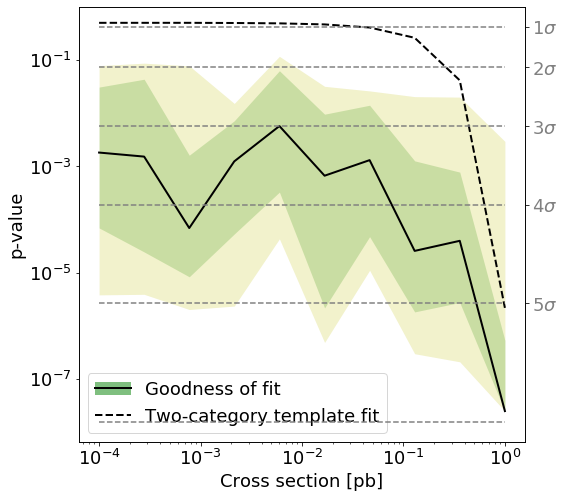

In [57]:
matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))

ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
core2cat = twocat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
plt.xscale('log')
plt.xlabel('Cross section [pb]')
plt.yscale('log')
plt.ylabel('p-value')
plt.ylim(1 - erf(5.8/np.sqrt(2)), 1)

plt.legend([(band1[0], core[0]), core2cat[0]], ['Goodness of fit', 'Two-category template fit'])

ax2 = ax1.twinx()
for i in range(1, 7):
    p = 1 - erf(i/np.sqrt(2))
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
plt.yscale('log')
ax2.set_yticks(1 - erf(np.arange(1,6)/np.sqrt(2)))
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')
